<a href="https://colab.research.google.com/github/ShrimanthAM/DeepLearningClass/blob/master/DATA690_Fall_2020HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW 1, Due  September 14th, 2020, 1 minute before class starts. 

1. Write a series of `for` loops that compute the average value in `torch_tensor3d`
1. Write code that indexes into `torch_tensor3d` and prints out the value "13". 
1. For every power of 2 (i.e., $2^i$ or `2**i` ) up to $2^{11}$, create a random matrix $X \in \mathbb{R}^{2^i, 2^i}$ (i.e., `X.shape` should give `(2**i, 2**i)`). Time how long it takes to compute $X X$ (i.e., `X @ X`) on a CPU and on a GPU and plot the speedup. For what sized matrices is the CPU faster than the GPU? 
2. We used PyTorch to find the numeric solution to $f(x) = (x-2)^2$. Write code that will find the solution to  $f(x)= \sin(x-2)\cdot(x+2)^2+\sqrt{\cos(x)}$. What answer do you get?
5. Affirm that you will not share the coure notebooks or images with any other person and will only use them for personal use. 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm.autonotebook import tqdm
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  after removing the cwd from sys.path.


As we progress through this book, we are not going to repeatedly show all of the imports, as that is mostly a waste of paper. Instead they will be available on-line as part of the downloadable copies of the code, which can be found LINK GOES HERE ONCE READY. 

In [ ]:
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

In [ ]:
import torch

In [ ]:
 torch_tensor3d = torch.tensor([
                            [
                            [ 1,  2,  3], 
                            [ 4,  5,  6],
                            ],
                            [
                            [ 7,  8,  9], 
                            [10, 11, 12],
                            ],
                            [
                            [13, 14, 15], 
                            [16, 17, 18],
                            ],
                            [
                            [19, 20, 21], 
                            [22, 23, 24],
                            ]
                              ])

In [ ]:
print(torch_tensor3d.size())

torch.Size([4, 2, 3])


In [ ]:
torch_tensor3d

tensor([[[ 1,  2,  3],
         [ 4,  5,  6]],

        [[ 7,  8,  9],
         [10, 11, 12]],

        [[13, 14, 15],
         [16, 17, 18]],

        [[19, 20, 21],
         [22, 23, 24]]])

In [ ]:
print(torch.transpose(torch_tensor3d, 0, 2).shape)

torch.Size([3, 2, 4])


In [ ]:
torch.transpose(torch_tensor3d, 0, 2)

tensor([[[ 1,  7, 13, 19],
         [ 4, 10, 16, 22]],

        [[ 2,  8, 14, 20],
         [ 5, 11, 17, 23]],

        [[ 3,  9, 15, 21],
         [ 6, 12, 18, 24]]])

In [ ]:
print("Is CUDA available? :", torch.cuda.is_available())
device = torch.device("cuda")

Is CUDA available? : True


In [ ]:
if torch.cuda.is_available():
  device = torch.device("cuda")
else:
  device = torch.device("cpu")

In [ ]:
device

device(type='cuda')

# HW 1, Due  September 14th, 2020, 1 minute before class starts. 

1. Write a series of `for` loops that compute the average value in `torch_tensor3d`
1. Write code that indexes into `torch_tensor3d` and prints out the value "13". 
1. For every power of 2 (i.e., $2^i$ or `2**i` ) up to $2^{11}$, create a random matrix $X \in \mathbb{R}^{2^i, 2^i}$ (i.e., `X.shape` should give `(2**i, 2**i)`). Time how long it takes to compute $X X$ (i.e., `X @ X`) on a CPU and on a GPU and plot the speedup. For what sized matrices is the CPU faster than the GPU? 
2. We used PyTorch to find the numeric solution to $f(x) = (x-2)^2$. Write code that will find the solution to  $f(x)= \sin(x-2)\cdot(x+2)^2+\sqrt{\cos(x)}$. What answer do you get?
5. Affirm that you will not share the coure notebooks or images with any other person and will only use them for personal use. 

**Q1**. Write a series of for loops that compute the average value in torch_tensor3d

In [ ]:
l=[]

In [ ]:
l=torch_tensor3d.shape

In [ ]:
l[0]

4

In [ ]:
sum1=[]
lst=[]
for x in range(l[0]):
    for y in range(l[1]):
        for z in range(l[2]):
          lst.append(torch_tensor3d[x][y][z])
#lst.item()          
#print(lst)
lst=torch.tensor(lst)
print(lst)
n=l[0]*l[1]*l[2]
avg=torch.sum(lst)
print(n)
avg


tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24])
24


In [ ]:
torch_tensor3d.sum()

tensor(300)

**Q2**. Write code that indexes into `torch_tensor3d` and prints out the value "13".

In [ ]:
torch_tensor3d

tensor([[[ 1,  2,  3],
         [ 4,  5,  6]],

        [[ 7,  8,  9],
         [10, 11, 12]],

        [[13, 14, 15],
         [16, 17, 18]],

        [[19, 20, 21],
         [22, 23, 24]]])

In [ ]:
torch_tensor3d[2,0,0].item()

13

**Q3** For every power of 2 (i.e., $2^i$ or `2**i` ) up to $2^{11}$, create a random matrix $X \in \mathbb{R}^{2^i, 2^i}$ (i.e., `X.shape` should give `(2**i, 2**i)`). Time how long it takes to compute $X X$ (i.e., `X @ X`) on a CPU and on a GPU and plot the speedup. For what sized matrices is the CPU faster than the GPU?

In [ ]:
import timeit
t_cpu=[]
for a in range (11):
   c = torch.rand(2**a, 2**a)
   #print(c.shape)
   time_cpu = timeit.timeit("c@c", globals=globals(), number=100)
   time_cpu=round(time_cpu, 5)
   t_cpu.append(time_cpu) 
   #print(round(time_cpu, 3))

In [ ]:
t_cpu

[0.00201,
 0.00068,
 0.00052,
 0.00095,
 0.00064,
 0.00068,
 0.00155,
 0.00977,
 0.04646,
 0.3667,
 2.83531]

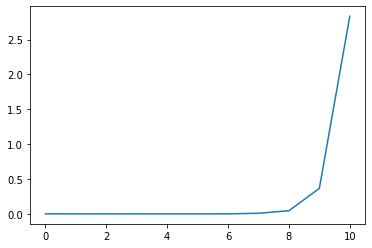

In [ ]:
plt.plot(t_cpu)

In [ ]:
t_gpu=[]
for b in range (10):
   y = torch.rand(2**b,2**b)
   y = y.to(device)
   #print(y.shape)
   time_gpu = timeit.timeit("y@y", globals=globals(), number=100)
   time_gpu=round(time_gpu,5)
   t_gpu.append(time_gpu)
   #print(time_gpu)

In [ ]:
t_gpu

[0.00154,
 0.00116,
 0.00112,
 0.00103,
 0.00121,
 0.00174,
 0.0011,
 0.00112,
 0.00111,
 0.00105]

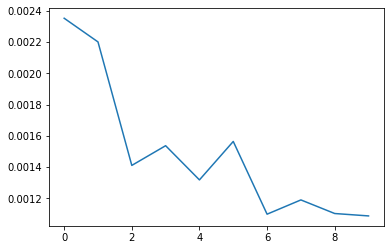

In [ ]:
plt.plot(t_gpu)

Q4. We used PyTorch to find the numeric solution to $f(x) = (x-2)^2$. Write code that will find the solution to  $f(x)= \sin(x-2)\cdot(x+2)^2+\sqrt{\cos(x)}$. What answer do you get?


In [ ]:
#def f(x):
#    return torch.pow((x-2.0), 2) 

def f(x):
  return torch.add(torch.mul(torch.sin(x-2.0),torch.pow((x+2.0),2)),torch.sqrt(torch.cos(x)))

#x_axis_vals = np.linspace(-7,9,100) 
#y_axis_vals = f(torch.tensor(x_axis_vals)).numpy()

#sns.lineplot(x_axis_vals, y_axis_vals, label='$f(x)=(x-2)^2$')

In [ ]:
x_axis_vals = np.linspace(-7,9,100)

In [ ]:
x_axis_vals

array([-7.        , -6.83838384, -6.67676768, -6.51515152, -6.35353535,
       -6.19191919, -6.03030303, -5.86868687, -5.70707071, -5.54545455,
       -5.38383838, -5.22222222, -5.06060606, -4.8989899 , -4.73737374,
       -4.57575758, -4.41414141, -4.25252525, -4.09090909, -3.92929293,
       -3.76767677, -3.60606061, -3.44444444, -3.28282828, -3.12121212,
       -2.95959596, -2.7979798 , -2.63636364, -2.47474747, -2.31313131,
       -2.15151515, -1.98989899, -1.82828283, -1.66666667, -1.50505051,
       -1.34343434, -1.18181818, -1.02020202, -0.85858586, -0.6969697 ,
       -0.53535354, -0.37373737, -0.21212121, -0.05050505,  0.11111111,
        0.27272727,  0.43434343,  0.5959596 ,  0.75757576,  0.91919192,
        1.08080808,  1.24242424,  1.4040404 ,  1.56565657,  1.72727273,
        1.88888889,  2.05050505,  2.21212121,  2.37373737,  2.53535354,
        2.6969697 ,  2.85858586,  3.02020202,  3.18181818,  3.34343434,
        3.50505051,  3.66666667,  3.82828283,  3.98989899,  4.15

In [ ]:
y_axis_vals = f(torch.tensor(x_axis_vals)).numpy()

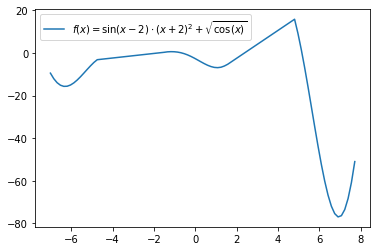

In [ ]:
sns.lineplot(x_axis_vals, y_axis_vals, label='$f(x)= \sin(x-2)\cdot(x+2)^2+\sqrt{\cos(x)}$')

In [ ]:
def fP(x): #Defining the derivative of f(x) manually
    return torch.mul(2,(x+2.0),torch.sin(x-2)) 

y_axis_vals_p = fP(torch.tensor(x_axis_vals)).numpy()

#First, lets draw a black line at 0, so that we can easily tell if something is positive or negative
sns.lineplot(x_axis_vals, [0.0]*len(x_axis_vals), label="0", color='black')
sns.lineplot(x_axis_vals, y_axis_vals, label='$f(x) = (x-2)^2$')
sns.lineplot(x_axis_vals, y_axis_vals_p, label="$f'(x)=2 x - 4$")

In [ ]:
x = torch.tensor([4.0], requires_grad=True)
print(x.grad)

None


In [ ]:
value = f(x)
print(value)

tensor([nan], grad_fn=<AddBackward0>)


In [ ]:
x = torch.tensor([-3.5], requires_grad=True)

x_cur = x.clone()
x_prev = x_cur*100
epsilon = 1e-5
eta = 0.1

while torch.norm(x_cur-x_prev) > epsilon:
    x_prev = x_cur.clone() #We need to make a clone here so that x_prev and x_cur don't point to the same object!
    
    #Compute our function, gradient, and update
    value = f(x)
    value.backward()
    x.data -= eta * x.grad
    x.grad.zero_() #We need to zero out the old gradient, as py-torch will not do that for us
    
    #What are we currently now?
    x_cur = x.data
    
print(x_cur)

tensor([nan])
